# Exploratory Data Analysis

---

1. [Import packages](#lib)
2. [Reading the data](#data)
3. [Descriptive statistics of data](#statistics)
4. [Data visualization](#visualization)
5. [Dashboard](#dash)

<a name='lib'> </a>
# 1. Importing Packages

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


<a name='data'> </a>
# 2. Reading the data

In [2]:
client_data=pd.read_csv('client_data.csv')
price_data=pd.read_csv('price_data.csv')


In [3]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


<a name='statistics'> </a>
# 3. Descriptive statistics of data

### Data Shape

In [5]:
print('The client data consists of {} rows and {} columns'.format(client_data.shape[0],client_data.shape[1]))
print('The price data consists of {} rows and {} columns'.format(price_data.shape[0],price_data.shape[1]))

The client data consists of 14606 rows and 26 columns
The price data consists of 193002 rows and 8 columns


### Data type

In [6]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Descriptive statistics of data

In [8]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


<a name='visualization'> </a>
# 4. Data visualization

In [9]:
client_data['has_gas']=client_data['has_gas'].replace({'t':'Subscribed','f':'Unsubscribed'})

In [10]:
client_data['churn_objective']=client_data['churn'].astype('object').replace({0:'retention',1:'churn'})

### Churning Status and Gas subscription

In [11]:
retention=client_data['churn'].value_counts()[0]
churn=client_data['churn'].value_counts()[1]

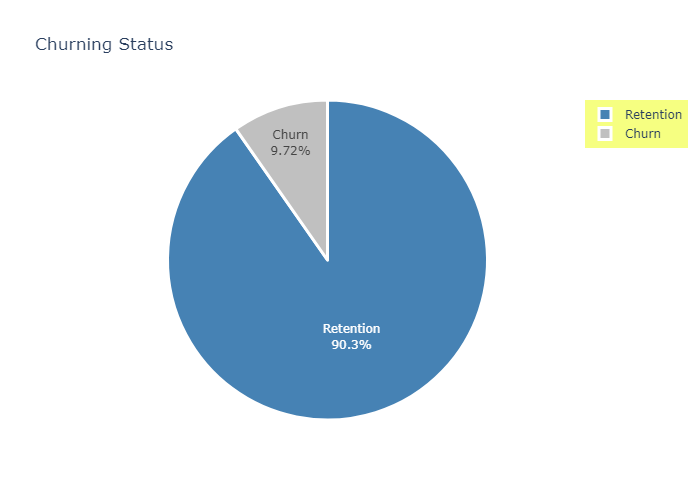

In [13]:
#Churning Status
Churn=px.pie(values=[retention,churn],names=['Retention','Churn'],title='Churning Status',
           color_discrete_map={'Retention':'rgb	(70,130,180)','Churn':'rgb(192,192,192)'},color=['Retention','Churn'])
Churn.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='rgb(255,255,255)', width=3)))
Churn.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
Churn.update_layout({'plot_bgcolor':'black'})
Churn.show('png')

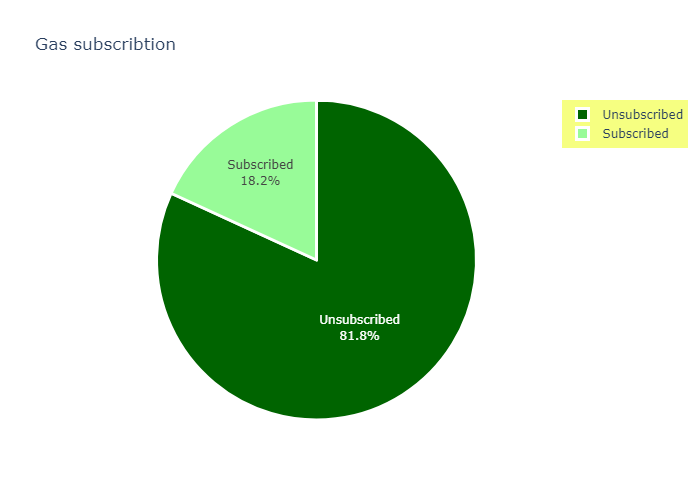

In [14]:
#Gas subscribtion
subscribed=client_data.has_gas.value_counts()[1]
unsubscribed=client_data.has_gas.value_counts()[0]
Gas=px.pie(values=[unsubscribed,subscribed],names=['Unsubscribed','Subscribed'],title='Gas subscribtion',
           color_discrete_map={'unsubscribed':'rgb(0,100,0)','subscribed':'rgb(152,251,152)'},color=['unsubscribed','subscribed']
          )
Gas.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(line=dict(color='rgb(255,255,255)', width=3)))
Gas.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
Gas.show('png')

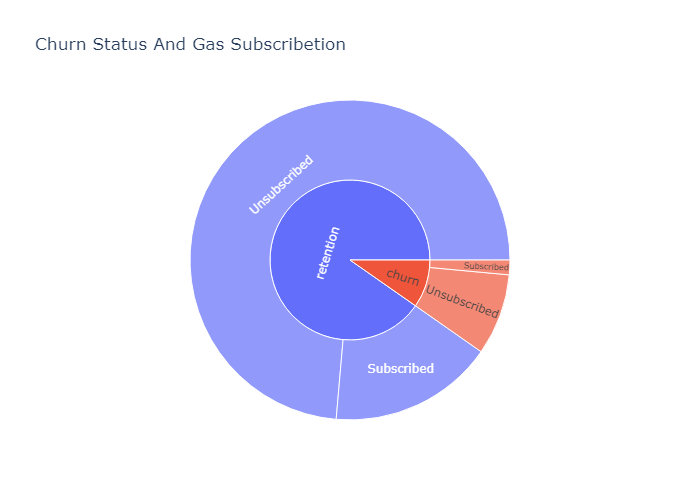

In [15]:
#Churn Status And Gas Subscribetion
churn_gas=px.sunburst(client_data,path=['churn_objective','has_gas'],title='Churn Status And Gas Subscribetion')
churn_gas.show('png')

### antiquity of the client (in number of years)

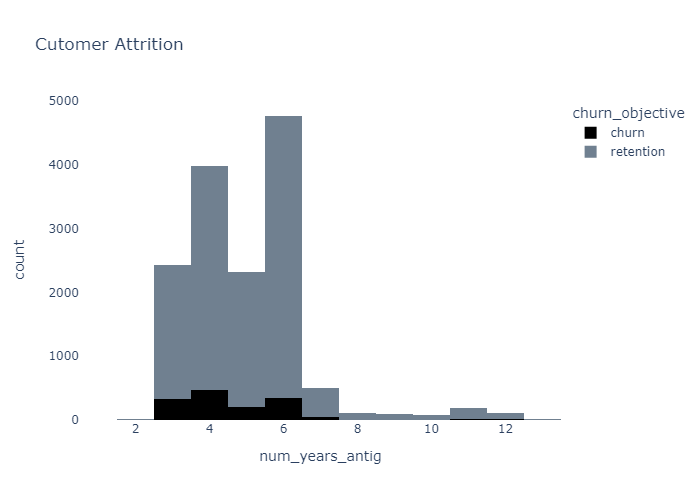

In [16]:
attrition=px.histogram(client_data,x='num_years_antig',color='churn_objective',color_discrete_map={'retention':'rgb(112,128,144)'
                                                                                                          ,'churn':'rgb(0,0,0)'},
          title='Cutomer Attrition')
attrition.update_layout({'plot_bgcolor':'white'})
attrition.show('png')

### the electricity campaign 

In [17]:
campaign=client_data[['id','origin_up','churn_objective']]
campaign=campaign.groupby(by=['origin_up','churn_objective'])['id'].count()
campaign=pd.DataFrame(campaign).reset_index()
campaign.columns=['origin_up','churn_objective','count']
for name in campaign['origin_up'].unique():
    Total=campaign[campaign['origin_up']==name]['count'].sum()
    for i in range(campaign.shape[0]):
        if campaign['origin_up'][i]==name:
            campaign['count'][i]=(campaign['count'][i]/Total)*100
            
campaign.head()

<ipython-input-17-5009819ebc49>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,origin_up,churn_objective,count
0,MISSING,churn,6
1,MISSING,retention,93
2,ewxeelcelemmiwuafmddpobolfuxioce,retention,100
3,kamkkxfxxuwbdslkwifmmcsiusiuosws,churn,6
4,kamkkxfxxuwbdslkwifmmcsiusiuosws,retention,93


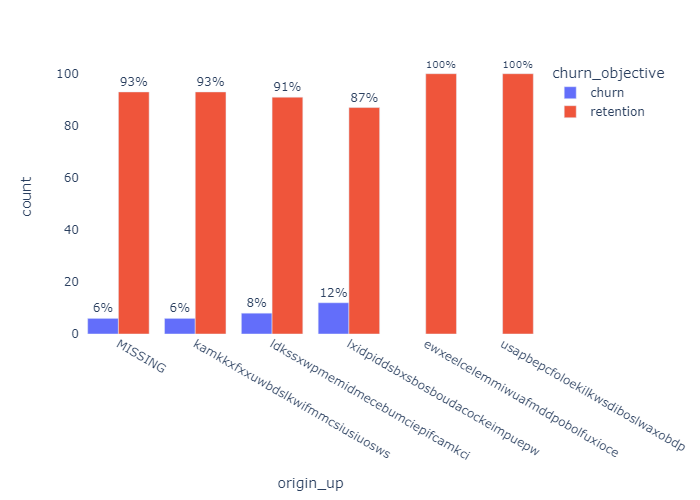

In [18]:
campaign_churn=px.bar(campaign,x='origin_up',y='count',color='churn_objective')
campaign_churn.update_layout(barmode='group')
campaign_churn.update_traces(texttemplate='%{value}%',textposition='outside')
campaign_churn.update_layout({'plot_bgcolor':'white'})
campaign_churn.show('png')

In [19]:
client_data['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

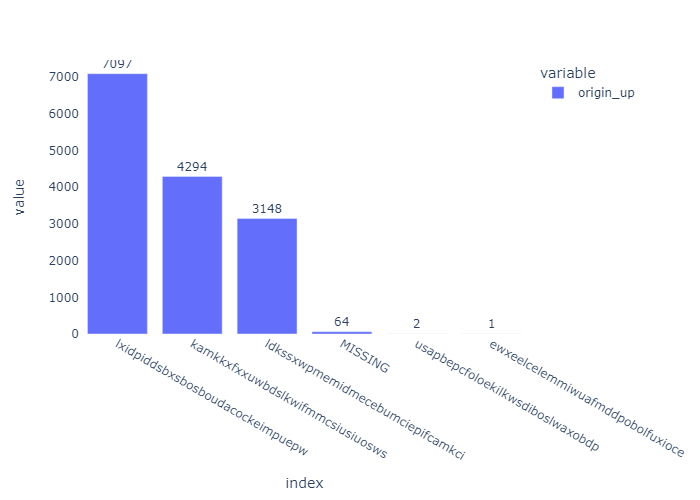

In [20]:
electricity_campaign=px.bar(client_data['origin_up'].value_counts())
electricity_campaign.update_traces(texttemplate='%{value}',textposition='outside')
electricity_campaign.update_layout({'plot_bgcolor':'white'})
electricity_campaign.show('png')

### Consumption

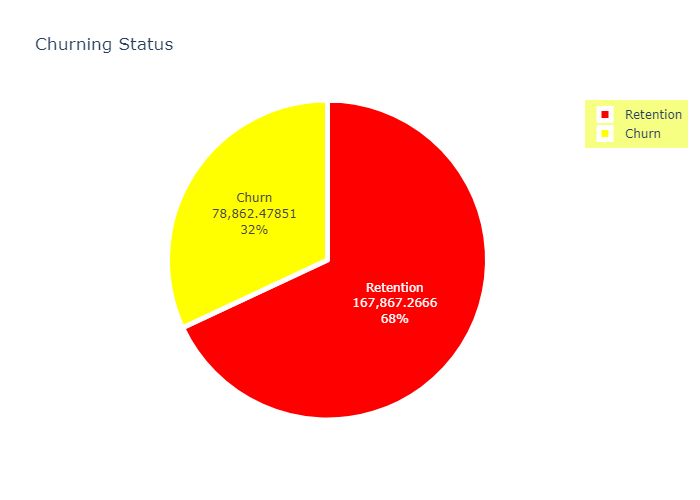

In [21]:
churn_mean_ele=client_data[client_data['churn']==1]['cons_12m'].mean()
retention_mean_ele=client_data[client_data['churn']!=1]['cons_12m'].mean()
fig=px.pie(values=[retention_mean_ele,churn_mean_ele],names=['Retention','Churn'],title='Churning Status',
           color_discrete_map={'Retention':'rgb(255,0,0)','Churn':'rgb(255,255,0)'},color=['Retention','Churn'])
fig.update_traces(textposition='inside', textinfo='value+label+percent', 
                  marker=dict(line=dict(color='rgb(255,255,255)', width=5)))
fig.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
fig.show('png')

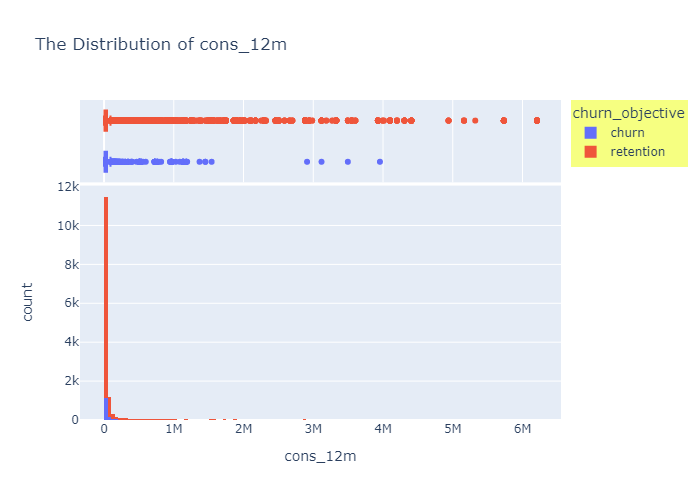

In [22]:
cons_distribution=px.histogram(client_data,x='cons_12m',color='churn_objective',marginal='box',title='The Distribution of cons_12m')
cons_distribution.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
cons_distribution.show('png')

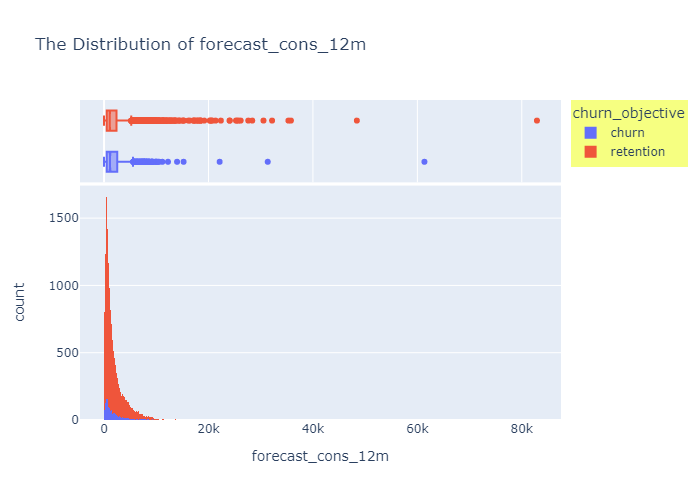

In [23]:
forecast_distribution=px.histogram(client_data,x='forecast_cons_12m',color='churn_objective',marginal='box',title='The Distribution of forecast_cons_12m')
forecast_distribution.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
forecast_distribution.show('png')


In [25]:
def plot_distribution(data,data_column,color_column):
    fig=px.histogram(data,x=data_column,color=color_column,marginal='box',title='The Distribution of '+data_column)
    fig.update_layout({'legend':{'bgcolor':'rgb(246,288,129)'}})
    return fig.show('png')

    
    

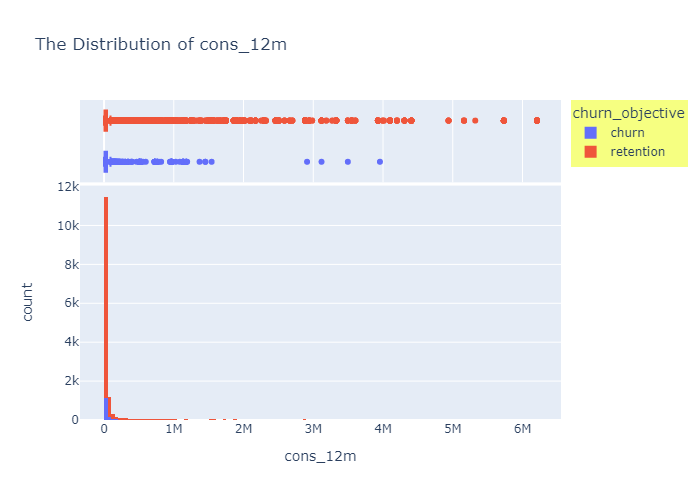

In [26]:
#electricity consumption of the past 12 months
cons_12m=plot_distribution(client_data,'cons_12m','churn_objective')

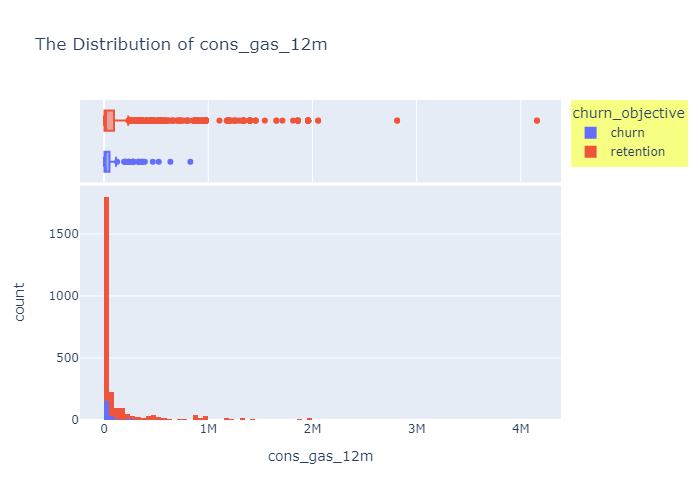

In [27]:
#gas consumption of the past 12 months
plot_distribution(client_data[client_data['has_gas']=='Subscribed'],'cons_gas_12m','churn_objective')

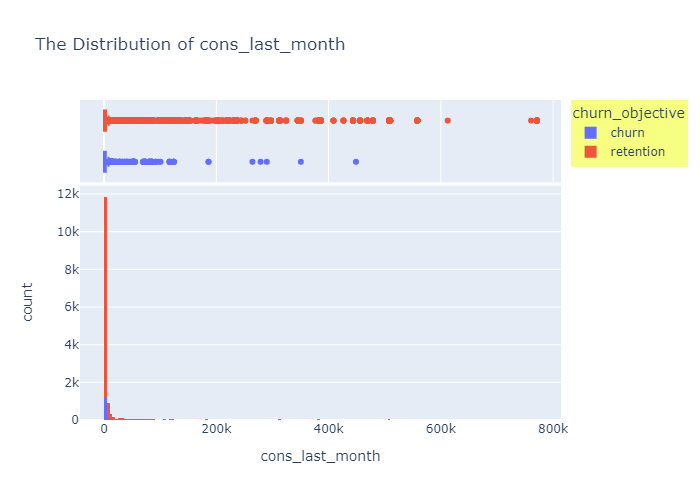

In [28]:
plot_distribution(client_data,'cons_last_month','churn_objective')

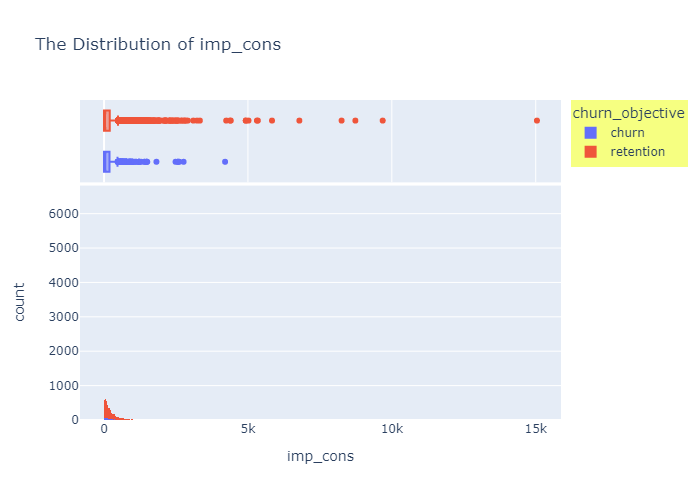

In [29]:
plot_distribution(client_data,'imp_cons','churn_objective')

### Forecast

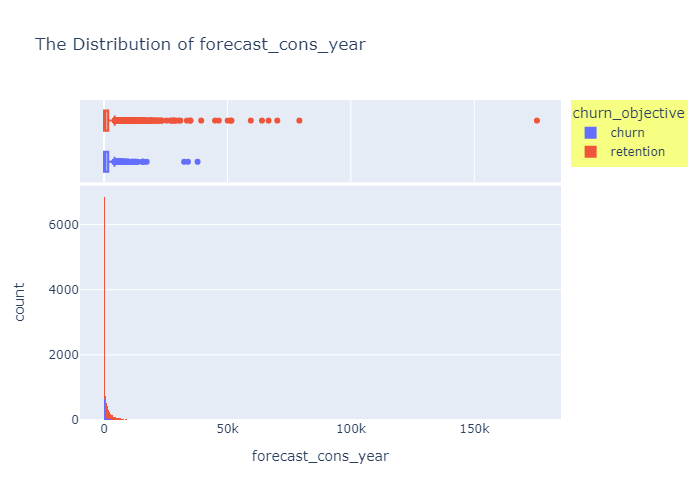

In [30]:
plot_distribution(client_data,'forecast_cons_year','churn_objective')

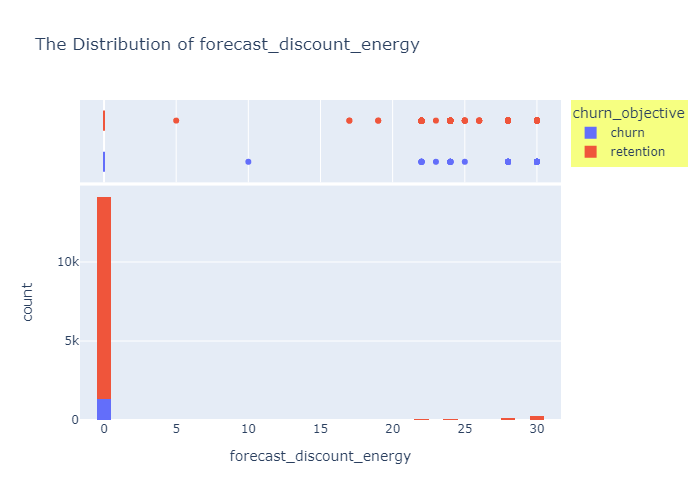

In [31]:
plot_distribution(client_data,'forecast_discount_energy','churn_objective')

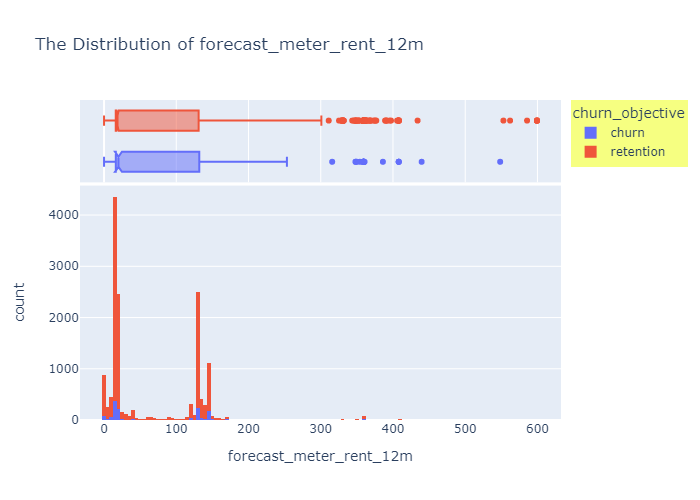

In [32]:
plot_distribution(client_data,'forecast_meter_rent_12m','churn_objective')

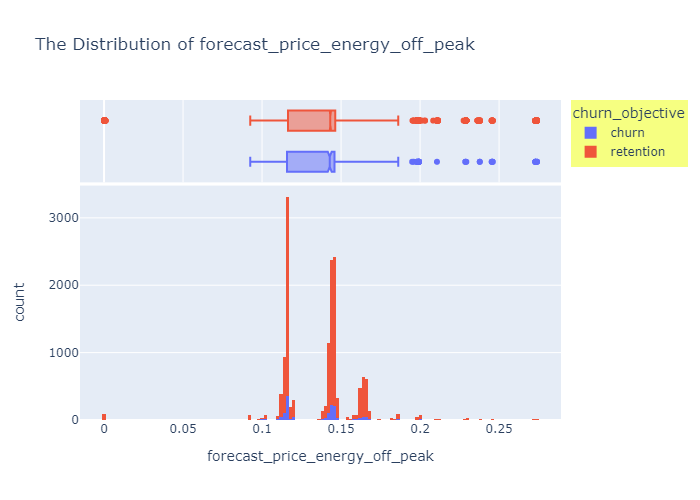

In [33]:
plot_distribution(client_data,'forecast_price_energy_off_peak','churn_objective')

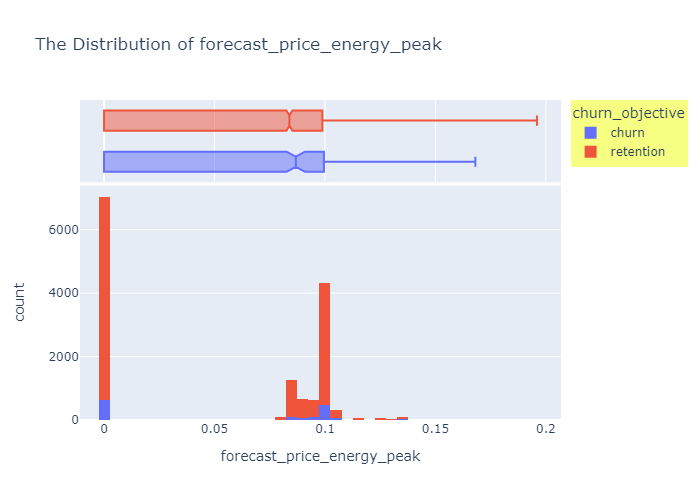

In [34]:
plot_distribution(client_data,'forecast_price_energy_peak','churn_objective')

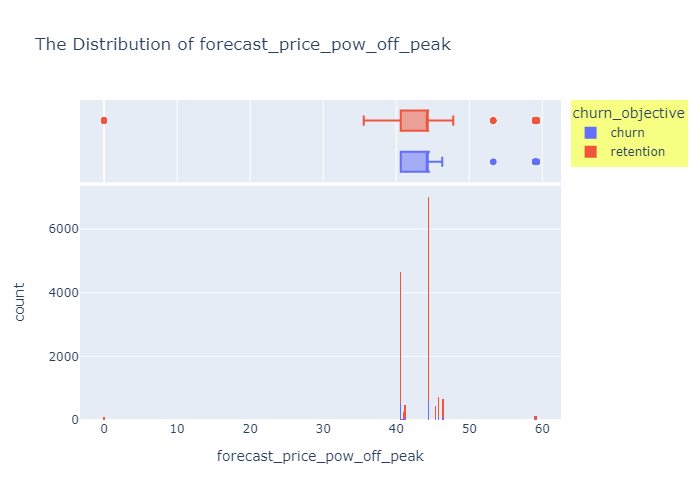

In [35]:
plot_distribution(client_data,'forecast_price_pow_off_peak','churn_objective')

### Other columns

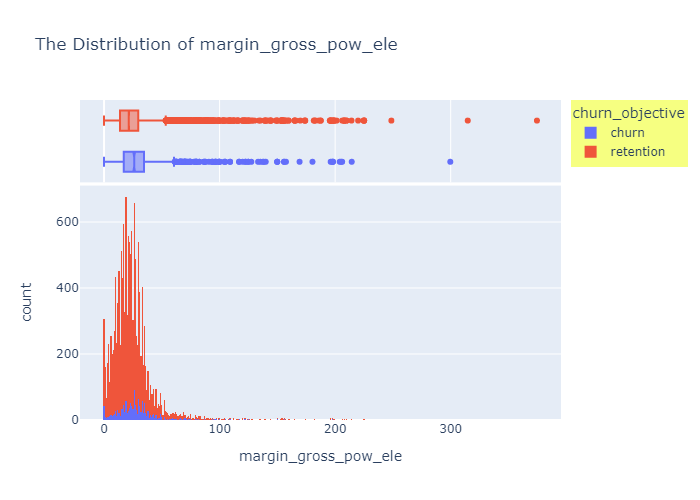

In [36]:
plot_distribution(client_data,'margin_gross_pow_ele','churn_objective')

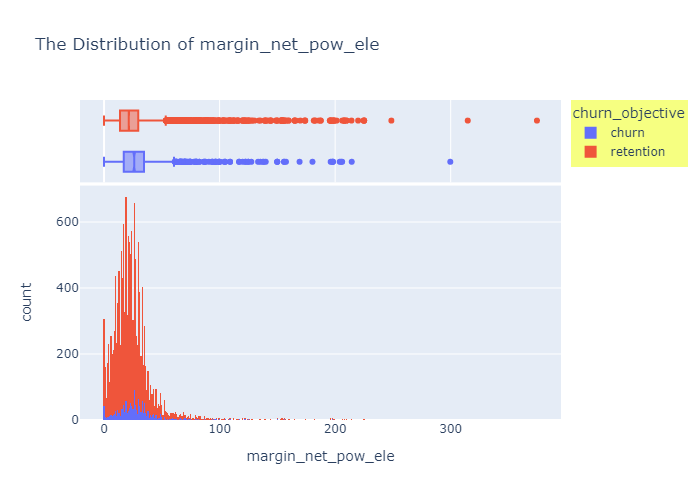

In [37]:
plot_distribution(client_data,'margin_net_pow_ele','churn_objective')

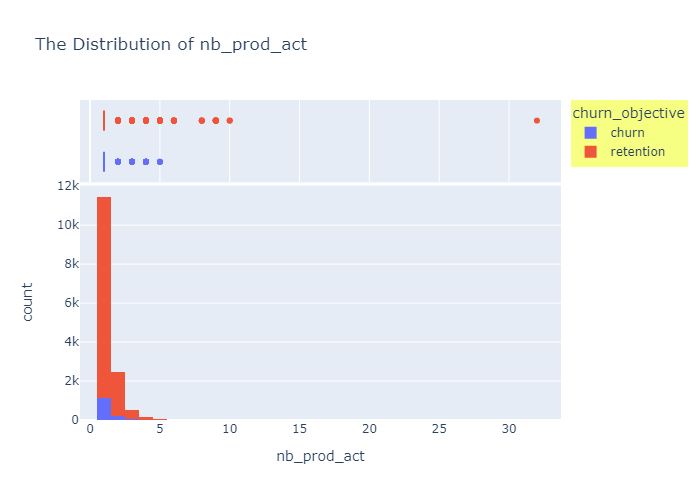

In [38]:
plot_distribution(client_data,'nb_prod_act','churn_objective')

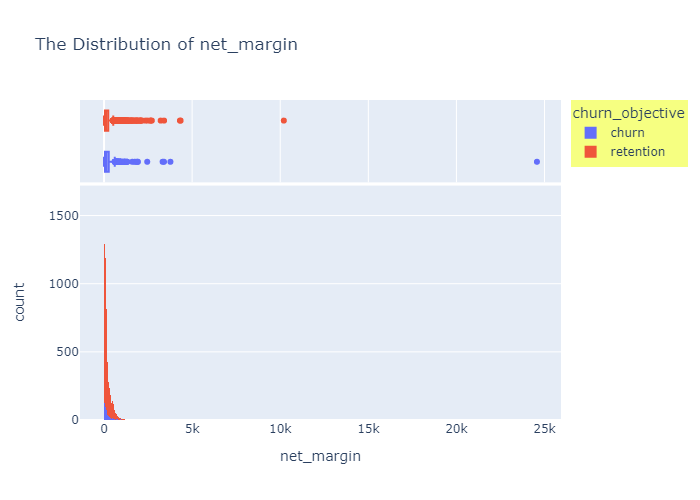

In [39]:
plot_distribution(client_data,'net_margin','churn_objective')

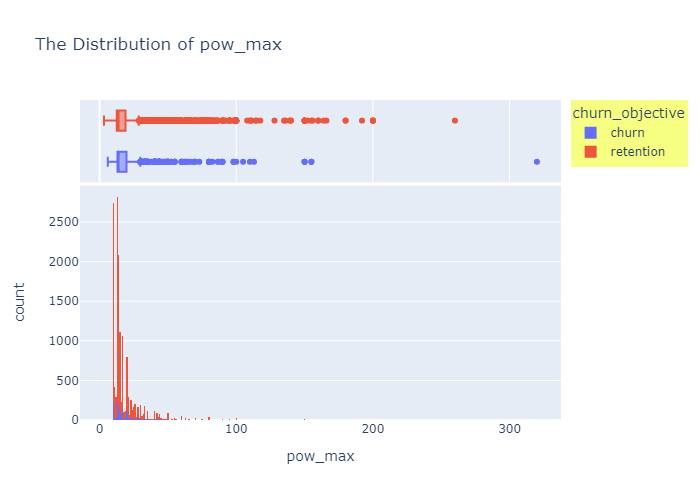

In [40]:
plot_distribution(client_data,'pow_max','churn_objective')

# EDA for Price data

In [41]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [42]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [43]:
price_data.groupby(by='id')['price_date'].count()

id
0002203ffbb812588b632b9e628cc38d    12
0004351ebdd665e6ee664792efc4fd13    12
0010bcc39e42b3c2131ed2ce55246e3c    12
0010ee3855fdea87602a5b7aba8e42de    12
00114d74e963e47177db89bc70108537    12
                                    ..
ffef185810e44254c3a4c6395e6b4d8a    12
fffac626da707b1b5ab11e8431a4d0a2    12
fffc0cacd305dd51f316424bbb08d1bd    12
fffe4f5646aa39c7f97f95ae2679ce64    12
ffff7fa066f1fb305ae285bb03bf325a    12
Name: price_date, Length: 16096, dtype: int64

In [44]:
price_data1=price_data.groupby(by='id').sum()
price_data1.head()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,1.492061,1.245525,0.877924,488.420789,293.052462,195.368327
0004351ebdd665e6ee664792efc4fd13,1.757118,0.000000,0.000000,532.625404,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,2.178702,0.000000,0.000000,543.836520,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,1.425085,1.179509,0.828384,487.769130,292.661462,195.107656
00114d74e963e47177db89bc70108537,1.775110,0.000000,0.000000,531.203164,0.000000,0.000000


In [45]:
data=client_data.merge(price_data1,on='id')
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,churn_objective,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,churn,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,retention,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,retention,2.046140,1.061055,0.000000,532.625404,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,retention,1.814521,0.000000,0.000000,532.803183,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,retention,1.490092,1.243658,0.874383,488.257873,292.954712,195.303161


In [46]:
cols=data.columns.tolist()
col=cols[:25]+cols[27:]+cols[25:27]
data=data[col]
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn,churn_objective
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.497445,1.208992,0.798365,491.307186,268.224124,178.816084,1,churn
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,1.795307,0.085483,0.000000,531.736503,0.000000,0.000000,0,retention
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2.046140,1.061055,0.000000,532.625404,0.000000,0.000000,0,retention
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,1.814521,0.000000,0.000000,532.803183,0.000000,0.000000,0,retention
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,1.490092,1.243658,0.874383,488.257873,292.954712,195.303161,0,retention


In [47]:
ii=px.box(data,x='churn_objective',y='price_off_peak_var',points='all',color_discrete_map={'churn':'rgb(0,0,255)','retention':
                                                                                           'rgb(255,215,0)'},
          title='price of energy for the 1st period',color='churn_objective')
fig.update_layout({'plot_bgcolor':'rgb(245,245,245)'})
fig.show()

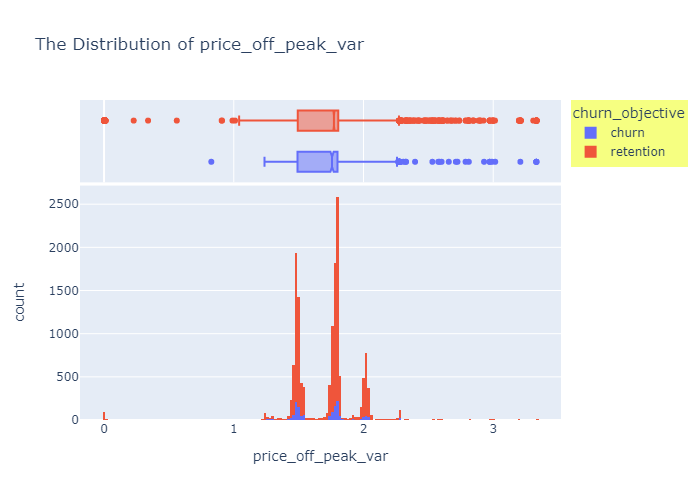

In [48]:
plot_distribution(data,'price_off_peak_var','churn_objective')

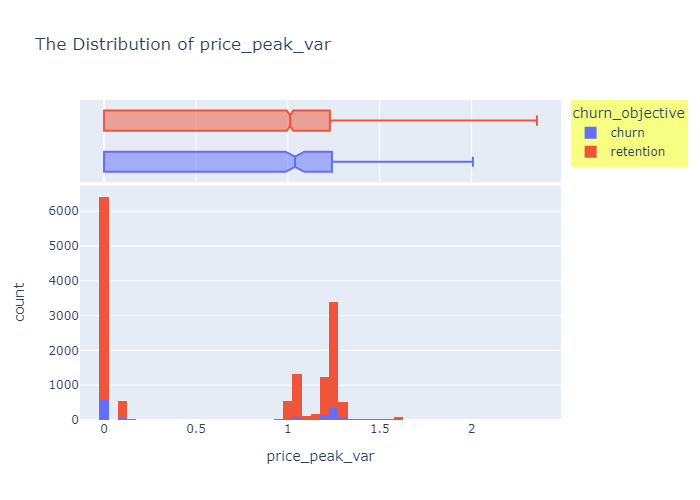

In [49]:
plot_distribution(data,'price_peak_var','churn_objective')

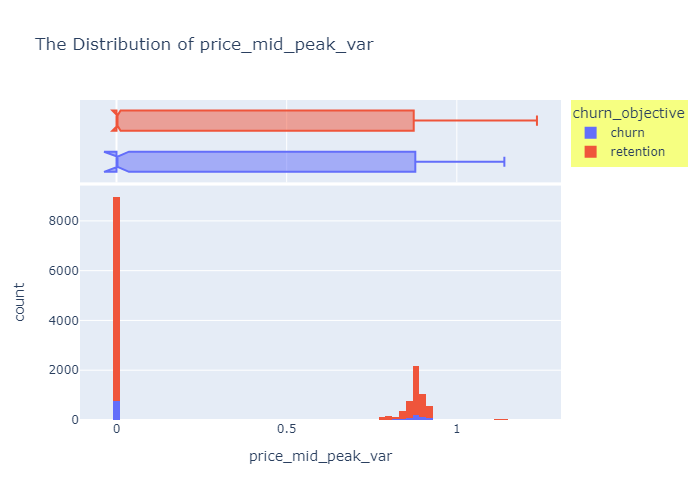

In [50]:
plot_distribution(data,'price_mid_peak_var','churn_objective')

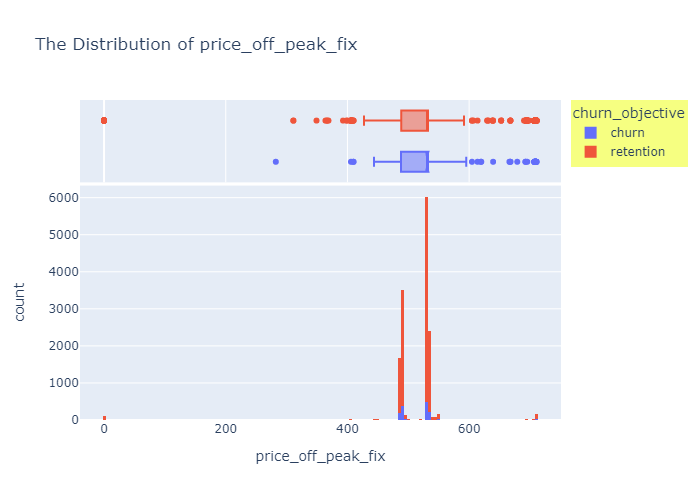

In [51]:
plot_distribution(data,'price_off_peak_fix','churn_objective')

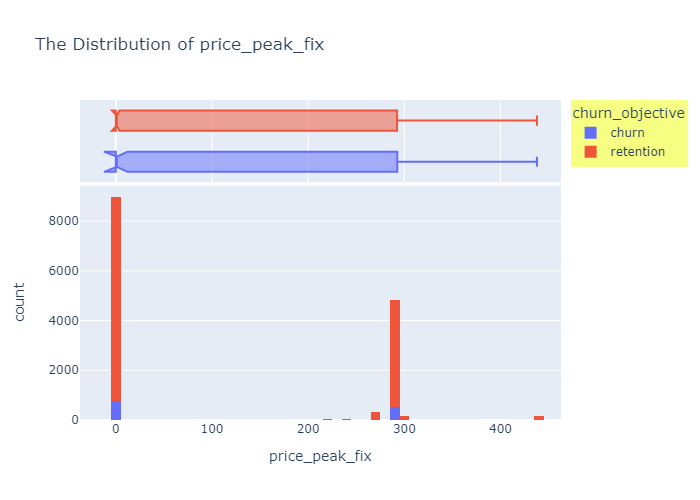

In [52]:
plot_distribution(data,'price_peak_fix','churn_objective')

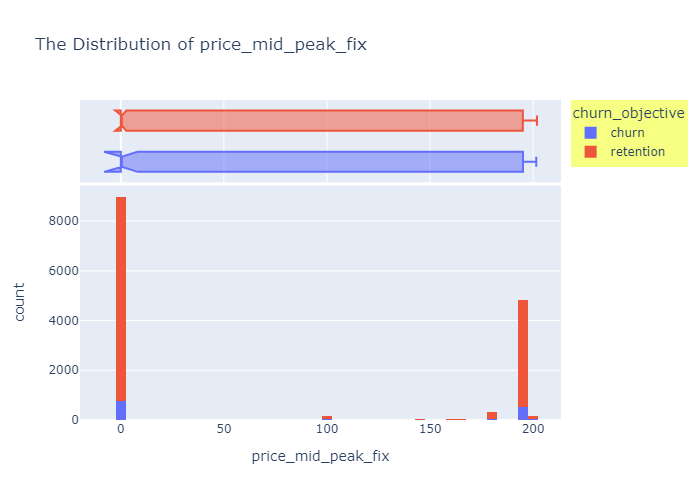

In [53]:
plot_distribution(data,'price_mid_peak_fix','churn_objective')

<a name='dash'> </a>
# Creating a Dashboard

In [62]:
import dash
import dash_core_components as dcc
import dash_html_components as html
logo_link='http://media-publications.bcg.com/BCG_MONOGRAM.png'
app = dash.Dash(__name__)
app.layout = html.Div(className='row', children=[
    html.Div(children=[html.Div(html.Img(src=logo_link,style={'margin':'30px 0px 0px 0px'})),
                       html.Div(html.H1(['Exploratory Data Analysis']))],style={'text-align':'center','font-size':50}),
    html.Div(children=[
        html.H1("Client Status ",style={'font-size':50}),
        dcc.Graph(id="graph1",figure=Churn ,style={'width':'500px','display': 'inline-block'}),
        dcc.Graph(id="graph2",figure=Gas ,style={'display': 'inline-block'}),
        dcc.Graph(id="graph3",figure=churn_gas ,style={'width':'500px','display': 'inline-block'}),
        dcc.Graph(id="graph4",figure=attrition ,style={'display': 'inline-block'}),
    ]),
    html.Div(children=[
        html.H1("Campaigns",style={'font-size':50}),
        dcc.Graph(id="graph5",figure=campaign_churn ,style={'width':'500px','display': 'inline-block'}),
        dcc.Graph(id="graph6",figure=electricity_campaign ,style={'display': 'inline-block'})
    ]),
    html.Div(children=[
        html.H1("Distributions",style={'font-size':50}),
        dcc.Graph(id='graph7',figure=cons_distribution,style={'display': 'inline-block'}),
        dcc.Graph(id='graph8',figure=forecast_distribution,style={'display': 'inline-block'})
    ])
    
])
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_0_0m1632235559.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/deps/react@16.v2_0_0m1632235559.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_0_0m1632235559.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_0_0m1632235559.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_0_0m1632235559.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_0_0m1632235559.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Jan/2022 15:13:49] "GET /_dash-component-suites/d